<a href="https://colab.research.google.com/github/PabloNatB/Projects/blob/main/Clustering_Colors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
from PIL import Image
from numpy import asarray
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

JPEG
(850, 1511)
RGB


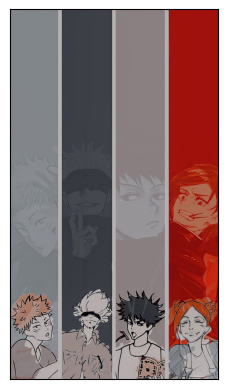

In [136]:
ruta='/content/drive/MyDrive/MachineLearning/Images/'
img="jjk_lines.jpg"
imagen = Image.open(ruta + img)

# summarize some details about the image
print(imagen.format)
print(imagen.size)
print(imagen.mode)
fig = plt.imshow(imagen)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)


In [137]:
# asarray() class is used to convert
# PIL images into NumPy arrays
numpydata = asarray(imagen)

# <class 'numpy.ndarray'>
print(type(numpydata))

#  shape
print(numpydata.shape)
reshaped_array=numpydata.reshape((imagen.size[0]*imagen.size[1],3))
print(reshaped_array.shape)

<class 'numpy.ndarray'>
(1511, 850, 3)
(1284350, 3)


In [138]:
n_colors=4
kmeans = KMeans(n_clusters=n_colors, random_state=0, n_init="auto")
kmeans.fit(reshaped_array)

KMeans(n_clusters=4, n_init='auto', random_state=0)

In [139]:
images=[]
n=int(imagen.size[1]/n_colors)
for center in kmeans.cluster_centers_:
    original_array=np.array(center, np.uint8)
    cloned_array = np.repeat(original_array, 2*n*n, axis=0)
    matrix = cloned_array.reshape((3, 2*n*n)).T
    matrix=matrix.reshape((2*n,n,3))
    pilImage = Image.fromarray(matrix)
    images.append(pilImage)

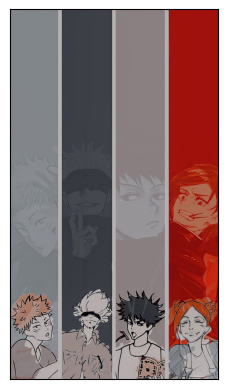

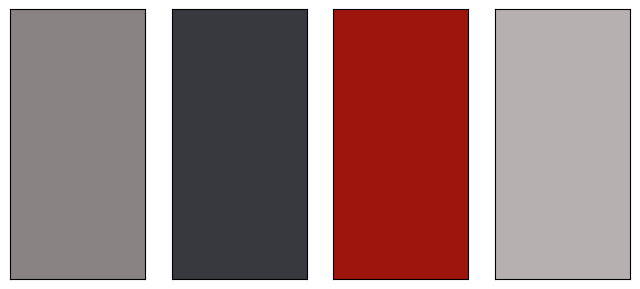

In [140]:
fig = plt.imshow(imagen)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
# Create a figure with a 1xn_colors subplot layout
fig, axes = plt.subplots(1, n_colors, figsize=(8, 12))

# Iterate over the n images and display them in the subplots
for i, image in enumerate(images):
    ax = axes[i]
    ax.imshow(image, interpolation='nearest')
    ax.set_xticks([])
    ax.set_yticks([])

# Display the figure
plt.show()

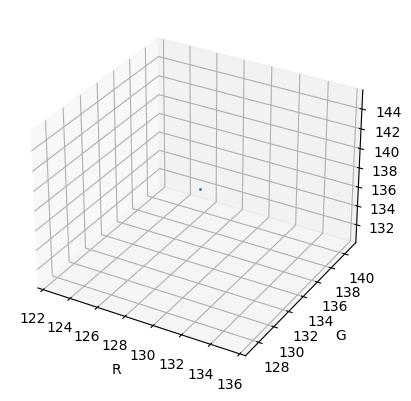

In [141]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
xs=np.array(reshaped_array.T[0][250000])
ys=np.array(reshaped_array.T[1][250000])
zs=np.array(reshaped_array.T[2][250000])
ax.scatter(xs,ys,zs, marker=m,s=1)

ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')

plt.show()